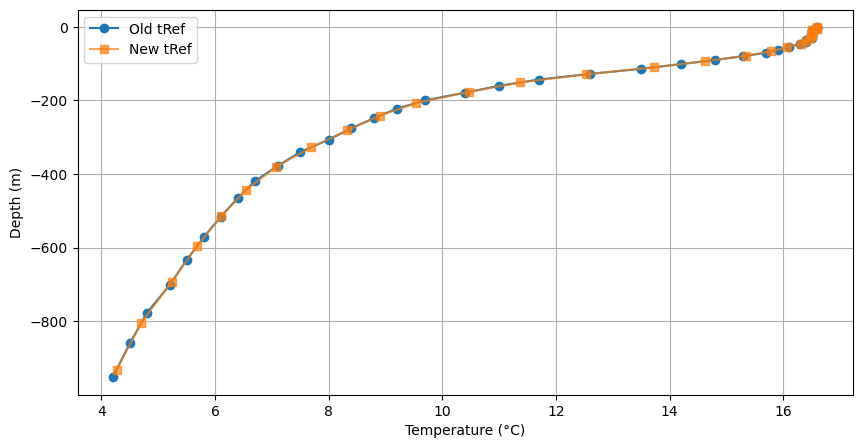

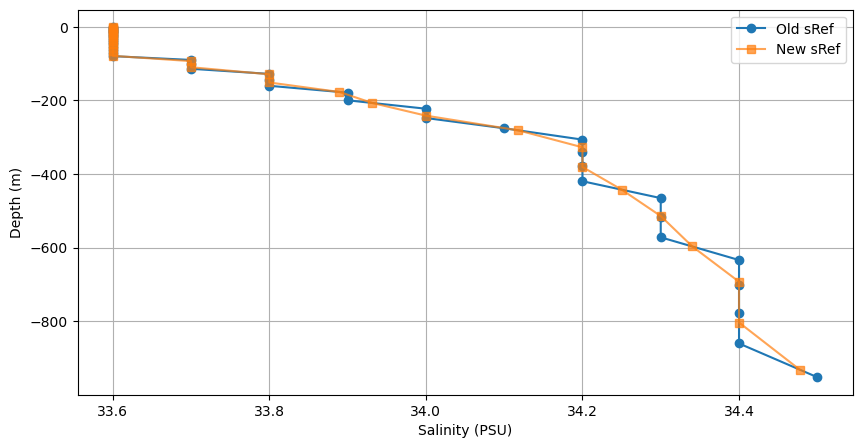


New tRef:
16.6, 16.6, 16.59, 16.5, 16.5, 16.5, 16.5, 16.5, 16.47, 16.4, 
16.31, 16.06, 15.79, 15.34, 14.63, 13.73, 12.54, 11.37, 10.46, 9.54, 
8.9, 8.33, 7.69, 7.07, 6.55, 6.11, 5.68, 5.24, 4.71, 4.27, 

New sRef:
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.7, 33.7, 33.8, 33.8, 33.89, 33.93, 
34.0, 34.12, 34.2, 34.2, 34.25, 34.3, 34.34, 34.4, 34.4, 34.48, 


In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Your old reference temperature and salinity profiles
tRef_old = np.array([16.6, 16.6, 16.6, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5,
                      16.5, 16.4, 16.4, 16.3, 16.1, 15.9, 15.7, 15.3,
                      14.8, 14.2, 13.5, 12.6, 11.7, 11.0, 10.4, 9.7,
                      9.2, 8.8, 8.4, 8.0, 7.5, 7.1, 6.7, 6.4,
                      6.1, 5.8, 5.5, 5.2, 4.8, 4.5, 4.2])

sRef_old = np.array([33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6,
                      33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6,
                      33.7, 33.7, 33.7, 33.8, 33.8, 33.8, 33.9, 33.9,
                      34.0, 34.0, 34.1, 34.2, 34.2, 34.2, 34.2, 34.3,
                      34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5])

# Old delR configuration (sum of delR defines depth levels)
delR_old = np.array([2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4,
                     4.9, 5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8,
                     10.8, 12.0, 13.2, 14.6, 16.1, 17.8, 19.7, 21.7,
                     24.0, 26.5, 29.3, 32.3, 35.7, 39.4, 43.6, 48.1,
                     53.1, 58.7, 64.8, 71.6, 79.1, 87.1, 96.3])

# Compute old depth levels
R_old_faces = np.zeros(len(delR_old) + 1)
R_old_faces[1:] = np.cumsum(delR_old)
RC_old = (R_old_faces[:-1] + R_old_faces[1:]) / 2  # Cell centers

# New delR configuration
delR_new = np.array([2.0, 2.3, 2.7, 3.1, 3.6, 4.1, 4.8, 5.6, 6.4, 
                    7.4, 8.6, 10.0, 11.5, 13.3, 15.4, 17.8, 20.6, 
                    23.9, 27.6, 32.0, 37.0, 42.8, 49.5, 57.3, 66.3, 
                    76.7, 88.8, 102.7, 118.8, 137.4,])

# Compute new depth levels
R_new_faces = np.zeros(len(delR_new) + 1)
R_new_faces[1:] = np.cumsum(delR_new)
RC_new = (R_new_faces[:-1] + R_new_faces[1:]) / 2  # New cell centers

# Interpolate old profiles to new depth levels
T_interp = interp1d(RC_old, tRef_old, bounds_error=False, fill_value="extrapolate")
S_interp = interp1d(RC_old, sRef_old, bounds_error=False, fill_value="extrapolate")

tRef_new = T_interp(RC_new)
sRef_new = S_interp(RC_new)

# Plot old vs. new profiles
plt.figure(figsize=(10, 5))
plt.plot(tRef_old, -RC_old, "o-", label="Old tRef")
plt.plot(tRef_new, -RC_new, "s-", label="New tRef", alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sRef_old, -RC_old, "o-", label="Old sRef")
plt.plot(sRef_new, -RC_new, "s-", label="New sRef", alpha=0.7)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Depth (m)")
plt.legend()
plt.grid()
plt.show()

# Print new reference profiles for MITgcm
print("\nNew tRef:")
for i, t in enumerate(np.round(tRef_new, 2)):
    print(f"{t},", end=" ")
    if (i + 1) % 10 == 0:
        print("")

print("\nNew sRef:")
for i, s in enumerate(np.round(sRef_new, 2)):
    print(f"{s},", end=" ")
    if (i + 1) % 10 == 0:
        print("")


In [3]:
len([16.6, 16.6, 16.6, 16.6, 16.6, 16.56, 16.51, 16.5, 16.5, 16.5, 
16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.45, 16.4, 
16.4, 16.38, 16.33, 16.24, 16.13, 16.01, 15.9, 15.78, 15.63, 15.4, 
15.14, 14.85, 14.52, 14.16, 13.76, 13.3, 12.78, 12.26, 11.73, 11.32, 
10.92, 10.57, 10.19, 9.78, 9.47, 9.18, 8.95, 8.71, 8.48, 8.24, 
8.0, 7.72, 7.44, 7.2, 6.97, 6.73, 6.55, 6.37, 6.19, 6.02, 
5.84, 5.66, 5.48, 5.31, 5.11, 4.87, 4.68, 4.5, 4.32, 4.14])

70

In [3]:
len(tRef_new)

50